In [1]:
import pandas as pd

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv('ASL_master.csv')

C:\Users\jose.carrasco\AppData\Local\Temp\ipykernel_1708\3207295029.py:1: DtypeWarning: Columns (1,3,8,11,12,13,15,16,17,18,26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('ASL_master.csv')


In [3]:
# Limpiar datos y seleccionar columnas importantes

In [4]:
sample2 = data[['Species','sampleYear','sampleDate','Length','Weight','Sex','Salt.Water.Age','Fresh.Water.Age','Lat','Lon','SASAP.Region']].dropna()

In [5]:
sample2['Salt.Water.Age'] = sample2['Salt.Water.Age'].astype(int)

In [6]:
sample2['Fresh.Water.Age'] = sample2['Fresh.Water.Age'].astype(int)

In [7]:
sample2['Age'] = sample2['Salt.Water.Age']+sample2['Fresh.Water.Age']+1

In [8]:
sample2 = sample2[sample2['Sex'].isin(['female', 'male'])]

In [9]:
sample2.head(10)

,Species,sampleYear,sampleDate,Length,Weight,Sex,Salt.Water.Age,Fresh.Water.Age,Lat,Lon,SASAP.Region,Age
706091,chinook,1965.0,1965-07-03,721.0,6.57,female,3,1,59.062019,-156.486916,Bristol Bay,5
706486,chinook,1981.0,1981-07-28,750.0,10.00,male,4,1,62.032597,-163.243350,Yukon,6
706488,chinook,1981.0,1981-07-28,870.0,1.00,female,4,1,62.032597,-163.243350,Yukon,6
706492,chinook,1981.0,1981-07-28,745.0,5.00,male,3,1,62.032597,-163.243350,Yukon,5
706510,chinook,1981.0,1981-07-29,885.0,25.00,male,4,1,62.032597,-163.243350,Yukon,6
706511,chinook,1981.0,1981-07-29,925.0,25.00,female,4,1,62.032597,-163.243350,Yukon,6
706514,chinook,1981.0,1981-07-29,925.0,1.00,female,4,1,62.032597,-163.243350,Yukon,6
706531,chinook,1981.0,1981-07-31,590.0,10.00,male,2,1,62.032597,-163.243350,Yukon,4
709254,chinook,1981.0,1981-01-01,815.0,1.00,male,3,1,62.149381,-162.800852,Yukon,5
709256,chinook,1981.0,1981-01-01,635.0,3.00,female,3,1,62.149381,-162.800852,Yukon,5


In [10]:
sample2.describe()

,sampleYear,Length,Weight,Salt.Water.Age,Fresh.Water.Age,Lat,Lon,Age
count,115287.000000,115287.000000,115287.000000,115287.000000,115287.00000,115287.000000,115287.000000,115287.000000
mean,1998.493594,560.046432,23.389236,2.571955,1.13567,58.919277,-145.153900,4.707625
std,18.496935,98.043623,82.187337,0.707081,0.64327,2.124836,11.738925,0.822121
min,1963.000000,0.000000,0.000000,0.000000,0.00000,55.098554,-164.761963,2.000000
25%,1979.000000,505.000000,0.000000,2.000000,1.00000,57.639997,-157.099300,4.000000
50%,2007.000000,546.000000,0.000000,3.000000,1.00000,58.869280,-136.062956,5.000000
75%,2015.000000,588.000000,7.500000,3.000000,2.00000,59.372135,-135.299633,5.000000
max,2016.000000,1130.000000,5587.000000,8.000000,3.00000,67.673035,-130.646135,9.000000


In [11]:
data.shape

(14347461, 27)

In [12]:
sample2.shape

(115287, 12)

In [13]:
sample2.sampleYear.unique().max()

2016.0

In [14]:
#1. Población de especies en diferentes regiones

In [15]:
#Seleccione las columnas que son necesarias para el análisis, elimine los valores atipicos y asi obtendremos una nueva Data llamada sample2 

In [16]:
# sns.set(rc={'figure.figsize':(6,8)})

In [17]:
sns.set_style("white")

C:\Users\jose.carrasco\AppData\Local\Temp\ipykernel_1708\3375452845.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=40,ha="right", rotation_mode="anchor")


[Text(0.5, 1.0, 'Distribución de especies en diferentes regiones')]

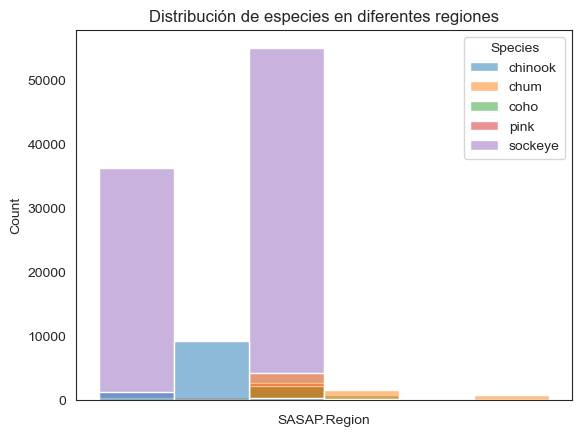

In [22]:
g = sns.histplot(data=sample2, x='SASAP.Region', hue='Species')
g.set_xticklabels(g.get_xticklabels(),rotation=40,ha="right", rotation_mode="anchor")
g.set(title='Distribución de especies en diferentes regiones')

In [23]:
#2. Vamos a Comparar las características biológicas del salmón rojo de la Bahía de Bristol y del sureste.

In [24]:
sockeye = sample2[(sample2['SASAP.Region'].isin(['Bristol Bay', 'Southeast'])) & (sample2['Species'] =='sockeye')].copy().reset_index(drop=True)

In [25]:
sockeye.head()

,Species,sampleYear,sampleDate,Length,Weight,Sex,Salt.Water.Age,Fresh.Water.Age,Lat,Lon,SASAP.Region,Age
0,sockeye,2015.0,2015-07-11,580.0,0.0,male,3,1,59.457952,-139.571432,Southeast,5
1,sockeye,2015.0,2015-07-11,440.0,0.0,female,2,1,59.457952,-139.571432,Southeast,4
2,sockeye,2015.0,2015-07-11,535.0,0.0,female,3,1,59.457952,-139.571432,Southeast,5
3,sockeye,2015.0,2015-07-11,440.0,0.0,female,2,1,59.457952,-139.571432,Southeast,4
4,sockeye,2015.0,2015-07-11,360.0,0.0,female,1,2,59.457952,-139.571432,Southeast,4


In [26]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Age', ylabel='Count'>

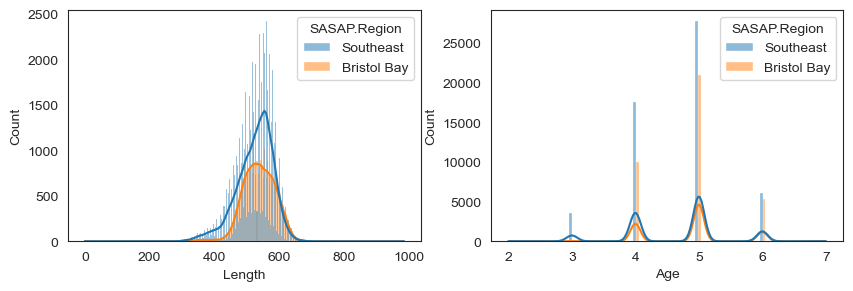

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(data=sockeye, x='Length', hue='SASAP.Region', kde=True, multiple='dodge', shrink=2, ax=axes[0])
sns.histplot(data=sockeye, x='Age', hue='SASAP.Region', kde=True, multiple='dodge', shrink=2, ax=axes[1])

In [28]:
#3. ¿Cuáles son los patrones de Longitud, Peso, Edad?

<AxesSubplot:xlabel='Weight'>

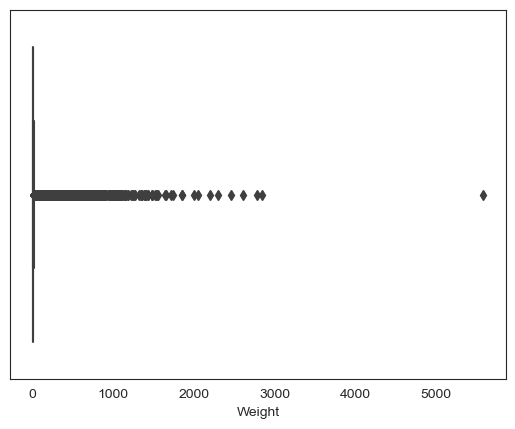

In [29]:
sample2['Weight'] = sample2['Weight'].astype(float)
sns.boxplot(data=sample2, x='Weight')

In [31]:
sample2['Length'] = sample2['Length'].astype(float)

<AxesSubplot:xlabel='Age'>

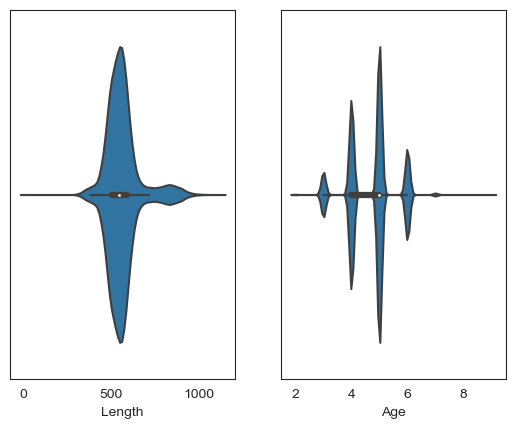

In [32]:
fig, axes = plt.subplots(1, 2)
sns.violinplot(data=sample2, x='Length', ax=axes[0])
sns.violinplot(data=sample2, x='Age', ax=axes[1])

In [33]:
#En general, las distribuciones de Longitud y Edad son las mismas. Las longitudes se distribuyen normalmente.

<AxesSubplot:xlabel='Sex', ylabel='Count'>

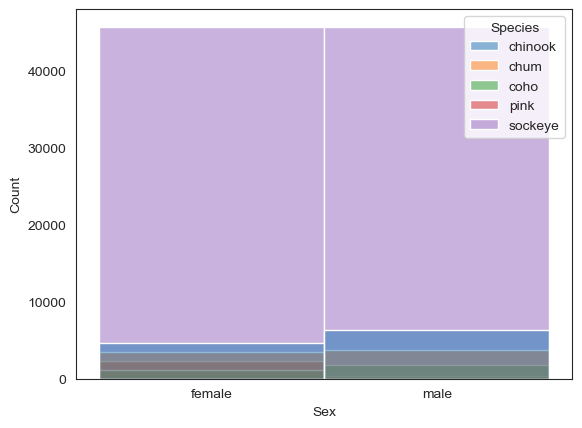

In [34]:
sns.histplot(data=sample2, hue='Species', x='Sex')

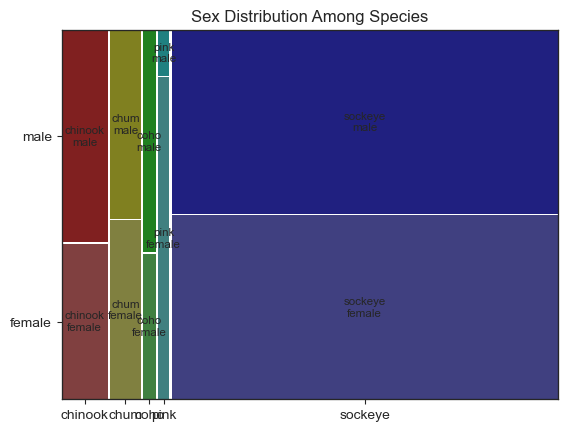

In [35]:
from statsmodels.graphics.mosaicplot import mosaic
t = mosaic(sample2, ['Species','Sex'], title='Sex Distribution Among Species')

In [36]:
#4. Haga un diagrama de pares de grupos de edad, longitud y sexo por especie. ¿Qué patrones se observarán?

In [38]:
ASL = sample2[['Age', 'Length', 'Sex', 'Species']].reset_index(drop=True)

In [39]:
ASL = sample2[['Age', 'Length', 'Sex', 'Species']].reset_index(drop=True)
ASL

,Age,Length,Sex,Species
0,5,721.0,female,chinook
1,6,750.0,male,chinook
2,6,870.0,female,chinook
3,5,745.0,male,chinook
4,6,885.0,male,chinook
...,...,...,...,...
115282,4,547.0,male,sockeye
115283,6,634.0,male,sockeye
115284,4,560.0,male,sockeye
115285,5,599.0,female,sockeye


In [41]:
ASL['Sex'] = ASL['Sex'].apply(lambda x: 1 if x=='female' else 0)

In [42]:
ASL.head()

,Age,Length,Sex,Species
0,5,721.0,0,chinook
1,6,750.0,0,chinook
2,6,870.0,0,chinook
3,5,745.0,0,chinook
4,6,885.0,0,chinook


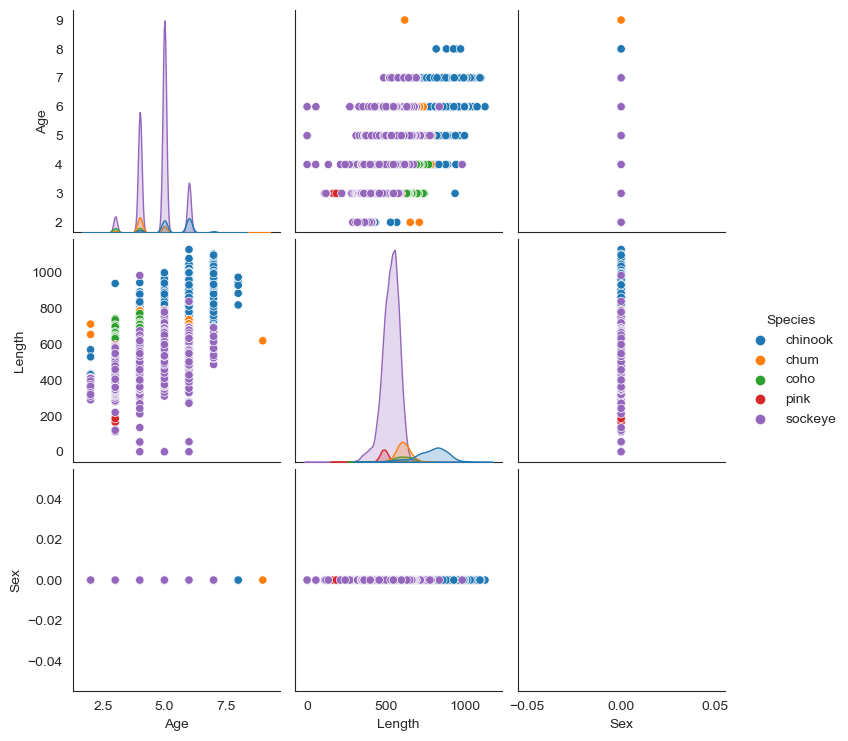

In [45]:
sns.pairplot(ASL, hue='Species')

In [46]:
# Tasa de crecimiento Anual

In [47]:
(sample2.groupby(by='sampleYear')).size()

sampleYear
1963.0     1532
1964.0     3087
1965.0     4454
1966.0        5
1967.0      179
1968.0      585
1970.0       24
1971.0     3215
1972.0        4
1973.0      155
1974.0     3721
1975.0     1471
1976.0      237
1977.0     1399
1978.0     7830
1979.0     1048
1980.0     2956
1981.0     2920
1982.0     1546
1983.0     1905
1984.0      330
1985.0      173
1986.0      282
1988.0      875
1989.0      789
1990.0      679
1991.0     1436
1992.0      494
1995.0      909
1996.0      589
1999.0        9
2000.0       43
2003.0     1965
2004.0     2548
2005.0     3877
2006.0     2579
2007.0     1794
2008.0     2509
2009.0     1441
2010.0     2162
2011.0     1572
2012.0      624
2013.0      576
2014.0    19904
2015.0    15638
2016.0    13217
dtype: int64

In [48]:
data.groupby(by='sampleYear').size()

sampleYear
1937.0        40
1957.0        14
1958.0       581
1959.0       377
1960.0       641
           ...  
2014.0    275630
2015.0    288241
2016.0    177308
2017.0      1532
2018.0        91
Length: 63, dtype: int64

In [49]:
#Debido a que los tamaños de muestra anuales de sample2 fluctúan demasiado, aquí utilizo el conjunto de datos original para calcular la tasa de crecimiento del tamaño de muestra.

In [50]:
len(list(data.sampleYear.dropna().unique().astype(int)))

63

In [51]:
min(data.sampleYear.dropna().unique().astype(int))

1937

In [52]:
max(data.sampleYear.dropna().unique().astype(int))

2018

In [53]:
max(list(set(np.arange(1937, 2019, 1)) - set(data.sampleYear.dropna().unique().astype(int))))

1956

In [54]:
#Los datos originales se recopilan desde 1937 hasta 2018. Para calcular la tasa de crecimiento, necesito datos con años consecutivos. Así que necesito eliminar los datos recopilados antes de 1956.


In [55]:
data['sampleYear']=data['sampleYear'].fillna(0).astype(int)
grow = data[data.sampleYear>1956].copy()
grow.sampleYear = grow.sampleYear.astype(int)

<AxesSubplot:xlabel='sampleYear', ylabel='Count'>

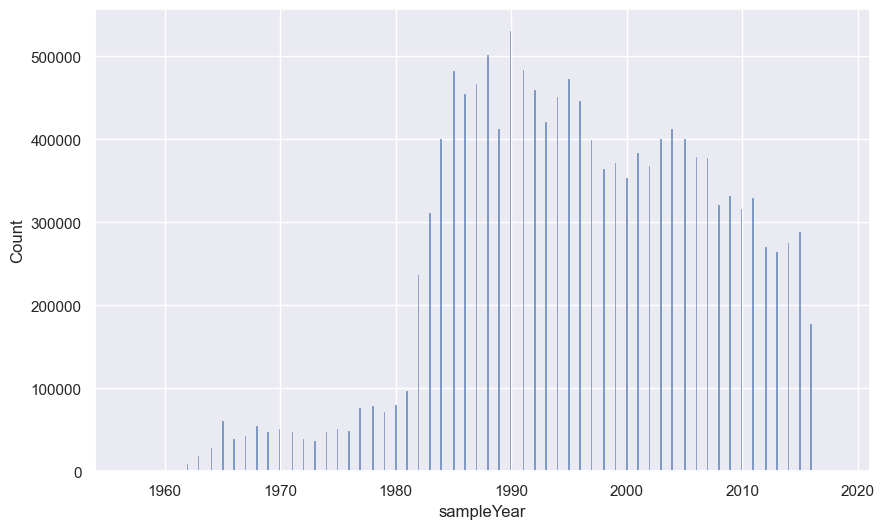

In [56]:
sns.set(rc={'figure.figsize':(10,6)})
sns.histplot(data=grow,x='sampleYear')

In [57]:
grow_count = pd.DataFrame(grow.groupby(by='sampleYear').size(), columns=['count']).reset_index()
grow_count

,sampleYear,count
0,1957,14
1,1958,581
2,1959,377
3,1960,641
4,1961,824
...,...,...
57,2014,275630
58,2015,288241
59,2016,177308
60,2017,1532


In [58]:
grow_count.index

RangeIndex(start=0, stop=62, step=1)

In [59]:
range(grow_count.shape[0])

range(0, 62)

In [60]:
grow_count['count'][0] 


14

In [61]:
rate = []

for i in range(grow_count.shape[0]):
    if i == 0:
        rate.append(0)
    else:
        rate.append(round((grow_count['count'][i] - grow_count['count'][i-1])/grow_count['count'][i-1],2))
grow_count['rate'] = rate
grow_count

,sampleYear,count,rate
0,1957,14,0.00
1,1958,581,40.50
2,1959,377,-0.35
3,1960,641,0.70
4,1961,824,0.29
...,...,...,...
57,2014,275630,0.04
58,2015,288241,0.05
59,2016,177308,-0.38
60,2017,1532,-0.99


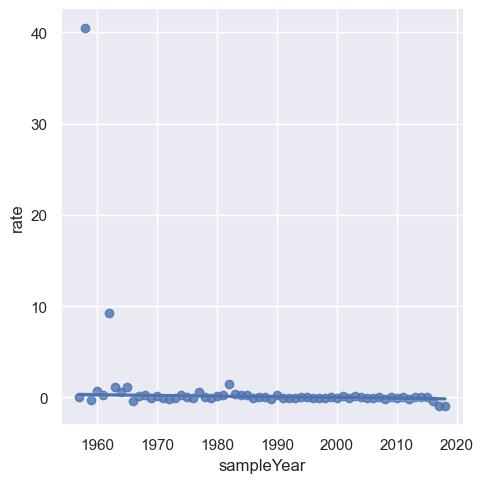

In [62]:
from statsmodels import robust
sns.lmplot(data=grow_count,x='sampleYear',y='rate', robust=True)

In [63]:
# eliminar los valores atípicos con tasa>=5

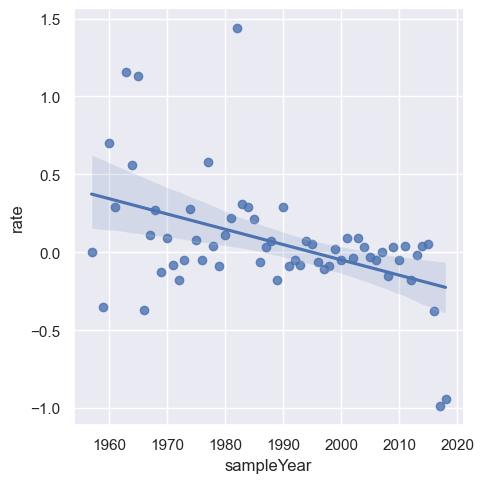

In [64]:
sns.lmplot(data=grow_count[grow_count.rate<5],x='sampleYear',y='rate')

In [65]:
#Del gráfico de regresión lineal sin valores atípicos, podemos ver que la tasa de crecimiento de la muestra disminuye a lo largo de los años (1960 a 2020)

In [67]:
#6. ¿Cuál es el efecto estacional mensual sobre la longitud del salmón

In [68]:
sample2.Sex.unique()

array(['female', 'male'], dtype=object)

In [69]:
sample2.groupby('Sex').size()

Sex
female    57363
male      57924
dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

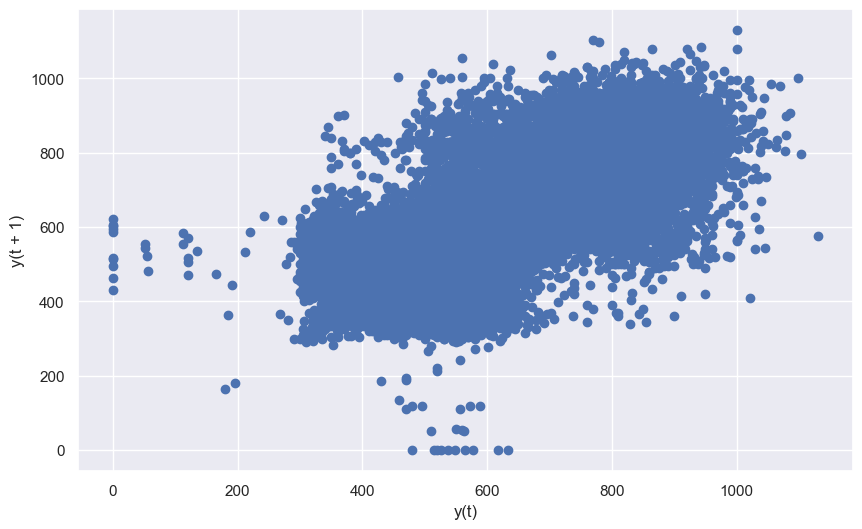

In [70]:
pd.plotting.lag_plot(sample2['Length'])

In [72]:
sns.reset_defaults()
pd.plotting.lag_plot(sample2['Age'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>